decision trees are versatile machine learning algorithms that can perform both regression and classification tasks and even multioutput tasks, they are capable of fitting complex datasets 

they are fundamental components of random forests which is among the most powerful machine learning algorithms available today

in this chapter we will start by discussing how to train and visualize and make predictions with decision trees, then we will go through the cart training algo and then see how to regularize decision trees for regression tasks at last we will discuss some limitations of using decision trees 

lets see how to train and visualize a decision tree :

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True) #as_frame loads the data as pandas dataframe instead of numpy array

x_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values #values convert the dataframe to numpy array for model input

y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
#max_depth = 2, limits the tree to 2 levels of depth helps avoid overfitting and makes it easier to visualize

tree_clf.fit(x_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

now lets visualize it :

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names = iris.target_names,
    rounded=True,
    filled=True
)

this creates a dot file describing trees structure 
rounde = true , rounded corners for better visuals 
filled = true, fills nodes with colours based on class proportions 

now lets display it :

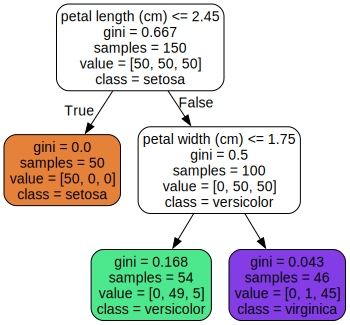

In [3]:
from graphviz import Source
Source.from_file("iris_tree.dot")

MAKING PREDICTIONS :

we will start at root node(depth 0) this node asks whether the petal length is smaller than 2.45 cm if it is then you move down the roots left child node (depth 1) which is a leaf node it dont ask any questions just predict the class which is iris setosa in our case

now if the petal length is greater than 2.45 cm it moves to right node which is a split node, now again if the petal length is smaller than 1.75 it is moved to left child node which is versicolor, if its not it goes to right child node which is virginica 

one of the main features of decision trees is that they need only a little bit of data preperation, in fact they dont need feature scaling or centering at all 

each node in decision tree stores information that helps explain :
how the data is split 
what predictions are likely
how pure the node is that is how confidently it assigned a class 

1. samples : how many training instances it applies to 
this tells how many data points from the training set reached that node 
eg : depth 1, right node (after petal length > 2.45 cm) -> samples = 100
this means 100 flowers had a petal length greater than 2.45

2. value : tells you how many training instances of each class this node applies to 
eg : bottom right node (depth 2, right):
value = [0,1,45]
means : 0 setosa, 1 versicolor, 45 virginica
the tree predicts virginica because its the majority class 

3. gini : gini impurity measures how mix the classes are in node 
gini = 0 pure node (only one class)
gini > 0 --> mixed classes
see formula copy-1 :
Gi = gini impurity of ith node 
Pi,k = proportion of class k instances in the node 
n = total no of classes 
eg: depth 2 left node
the gini impurity is 0.168, the node is not pure since it contains mostly versicolor and a few virginica 
the impurity score is low meaning one class dominates, but its not perfectly pure 

scikit learn uses the CART algorithm, which produces only binary trees, meaning trees where split nodes always have two children(i.e. questions only have yes or no answers)
other algorithms such as ID3 can produce decision trees with nodes that have more than 2 children 


now lets understand how decision trees create decision boundaries :
see fig 6-2 :

the plot shows how decision trees partitions the feature space on:
x- axis = petal length
y-axis = petal width

depth 0 - root node split :
the thick vertical boundary represents the decision boundary of the root node(depth 0) = petal length = 2.45 cm
all data with petal length <= 2.45 moves to left side yellow region
the region is pure setosa no further splitting is needed

depth 1 - right split
all data with petal length > 2.45 cm(right of the vertical line) goes into this region 
this region contains both versicolor and virginica so its impure 
the tree splits this area horixontally at petal width = 1.75 cm 
bottom right(blue) = versicolor region petal width <= 1.75 cm
top right green = virginica region -> petal width > 1.75

if you set max depth = 3 then additional decision boundary represented by two vertical dotted lines 

vertical lines = decisions based on petal length 
horizontal lines = decisions based on petal width 
trees partition the space into rectangles - each rectangle belongs to one class
the more depth you allow the more complex and fine grained these regions become 

MODEL INTERPRETATION : WHITE BOX VERSUS BLACK BOX

decision trees are intuitive and their decision is easy to interpret, such models are called white box models
the random forests and neural networks are considered as black box models they make great predictions and you can easily check the calculations they used to perform the calculations but it is hard to explain why the predictions where made, eg :
if a neural network says a person appeared in a picture, its hard to tell what contributed to this prediction whether its eyes, mouth, lips 
whereas decision trees provides nice easy classification that even you can apply manually, this is important to make sure the system wont make unfair decisions 


ESTIMATING CLASS PROBABILITIES :

now lets see how decision tree classifier can output class probabilities not just hard predictions like class labels

traversal :
when given an input (eg: a flower length = 5 cm and petal width = 1.5 cm), the decision tree traverses from the root node down to appropriate leaf node following the appropriate decision rules (eg: petal length > 2.45 cm, petal width < 1.75 etc)

leaf node lookup :
once it reaches the leaf node, it checks the training samples that fell into the leaf node during training 
the prediction is based on the distribution of class labels in this node

probability calc :
suppose the leaf node contains 54 training samples :
0 samples of iris setosa  0 / 54 = 0%
49 samples of iris versicolor 49 / 54 ≈ 90.7%
5 samples of iris virginica 5 / 54 ≈ 9.3%

the class with the highest probability wins 

lets apply this :

In [4]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [5]:
tree_clf.predict([[5, 1.5]])

array([1])

the model thinks theres a 90.7 % chance of iris versicolor
if the petals were 6 cm long and 1.5 cm wide it will also be predicted as iris versicolor coz it lies in the bottom right part of the plot even if its more likely to be iris virginica biologically